In [1]:
#  Jordan Hoover
#  CSC570R Fall 2016
#  Assignment: 
#  LSA lab, using Python 3.5

## Boston Housing Assignment

In this assignment you'll be using linear regression to estimate the cost of house in boston, using a well known dataset.

Goals:
+  Measure the performance of the model I created using $R^{2}$ and MSE
> Learn how to use sklearn.metrics.r2_score and sklearn.metrics.mean_squared_error
+  Implement a new model using L2 regularization
> Use sklearn.linear_model.Ridge or sklearn.linear_model.Lasso 
+  Get the best model you can by optimizing the regularization parameter.   

In [2]:
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt
%pylab inline
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso # use lasso: 
import math

Populating the interactive namespace from numpy and matplotlib


In [3]:
bean = datasets.load_boston()
print(bean.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [4]:
def load_boston():
    scaler = StandardScaler()
    boston = datasets.load_boston()
    X=boston.data
    y=boston.target
    X = scaler.fit_transform(X)
    return train_test_split(X,y)
    

In [5]:
X_train, X_test, y_train, y_test = load_boston()

### Fitting a Linear Regression

It's as easy as instantiating a new regression object (line 1) and giving your regression object your training data
(line 2) by calling .fit(independent variables, dependent variable)

The main steps are, 
* instantiate the regression object
* give the object the training data
* make the prediction
* take a look at the results 

In [6]:
# instantiate new regression object, give it training data, and then make predictions
# I put fit and predict together to simplify code, so I don't repeat clf.predict(..) many times
# Changed LinearRegression() object from clf to y_pred_lr to hold predicted values after fitting
# I changed the variable name to something that was easier for me to remember
# I since later learned that clf is the convention for naming the instance, but
# did not want to change it back and risk screwing up the rest of the code.
y_pred_lr = LinearRegression().fit(X_train, y_train).predict(X_test) 

### Making a Prediction
X_test is our holdout set of data.  We know the answer (y_test) but the computer does not.   

Using the command below, I create a tuple for each observation, where I'm combining the real value (y_test) with
the value our regressor predicts (clf.predict(X_test))

Use a similiar format to get your r2 and mse metrics working.  Using the [scikit learn api](http://scikit-learn.org/stable/modules/model_evaluation.html) if you need help!

In [7]:
# wrap zip with list to modify for Python 3
# show the real values and the predicted values
list(zip(y_test, y_pred_lr))

[(18.0, 19.397557962233932),
 (22.0, 27.18188428377406),
 (16.199999999999999, 20.381730857099303),
 (43.5, 39.703051852733189),
 (14.4, 3.7969206155713415),
 (7.2000000000000002, 9.5384893332743665),
 (20.100000000000001, 18.312467548842307),
 (15.1, 16.853226033906417),
 (18.5, 19.236289325893623),
 (17.399999999999999, 22.222312677082428),
 (21.100000000000001, 22.061006183481954),
 (17.100000000000001, 17.687939373025142),
 (10.4, 16.945675089450059),
 (11.9, 6.7855880646192421),
 (19.800000000000001, 21.741474707506374),
 (19.600000000000001, 20.98997019155977),
 (19.399999999999999, 23.298896841979825),
 (13.1, 14.123687193615039),
 (19.800000000000001, 18.403011361121123),
 (16.699999999999999, 19.707195246740714),
 (16.100000000000001, 18.717406636805709),
 (24.699999999999999, 22.945418680457241),
 (17.800000000000001, 17.686669481248387),
 (14.0, 13.993653072350169),
 (21.199999999999999, 23.159140413180971),
 (10.5, 13.093183934368632),
 (10.5, 5.63711293263),
 (23.699999999

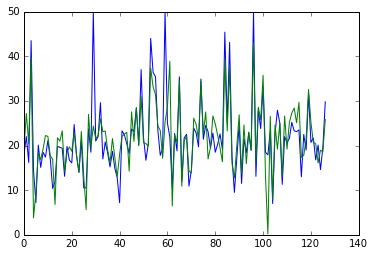

In [8]:
# this plot is showing that the predicted values seem to closely match the actual values except for 
# extreme situations
plt.plot(list(zip(y_test, y_pred_lr)))

Measuring R^2 and MSE:

In [9]:
# measure R^2
r2_score_lr = r2_score(y_test, y_pred_lr)
print('R squared for linear regression: %f' %r2_score_lr)

R squared for linear regression: 0.622382


In [10]:
# measure RSME
rsme=math.sqrt(mean_squared_error(y_test, y_pred_lr ))
print('RSME for linear regression: %f' %rsme)

RSME for linear regression: 5.148271


2nd part:  a new model using L2 regularization:

In [11]:
lasso=Lasso() #create new instance of lasso

# give lasso object the training data, and then make the prediction for test data
y_pred_lasso=lasso.fit(X_train, y_train).predict(X_test) 


In [12]:
list(zip(y_test, y_pred_lasso))

[(18.0, 20.449477148399644),
 (22.0, 27.600242585935167),
 (16.199999999999999, 20.816073931549141),
 (43.5, 35.922928847895342),
 (14.4, 5.1496457252043584),
 (7.2000000000000002, 12.810286228452695),
 (20.100000000000001, 18.187432594430756),
 (15.1, 17.058312897173749),
 (18.5, 19.945457807760832),
 (17.399999999999999, 21.970544951396633),
 (21.100000000000001, 20.610665176686133),
 (17.100000000000001, 18.942867079645783),
 (10.4, 22.584257110559889),
 (11.9, 7.0002656176961757),
 (19.800000000000001, 24.70373504154016),
 (19.600000000000001, 22.079757407789518),
 (19.399999999999999, 24.771589218917306),
 (13.1, 15.747799309745904),
 (19.800000000000001, 19.048751419411438),
 (16.699999999999999, 20.78103365018081),
 (16.100000000000001, 19.525335050983191),
 (24.699999999999999, 22.113409697045032),
 (17.800000000000001, 18.467633502340977),
 (14.0, 15.098702975084517),
 (21.199999999999999, 23.632552131566772),
 (10.5, 15.132191467988655),
 (10.5, 7.057883307567705),
 (23.69999

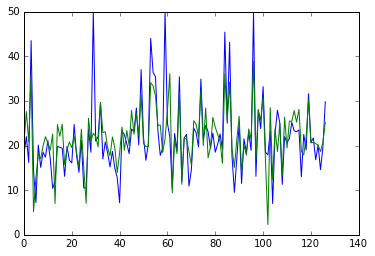

In [13]:
# plot showing predicted values vs actual values
plt.plot(list(zip(y_test, y_pred_lasso)))

In [14]:
r2_score_lasso = r2_score(y_test, y_pred_lasso)
print(' Lasso R squared on the test data: %f' % r2_score_lasso)

 Lasso R squared on the test data: 0.548520


 R squared is slightly worse for Lasso than LinearRegression


In [15]:
# calculate RSME for Lasso
rsme=math.sqrt(mean_squared_error(y_test, y_pred_lasso))
print('RSME for Lasso: %f' %rsme)

RSME for Lasso: 5.629298


RSME is similiar for both methods.  Possibly we can do better.

# Improving the Model by optimizing the regularization parameter:


In [16]:
# try for lasso 
# lower alpha parameter
alpha = 0.01
lasso=Lasso(alpha=alpha) #create new instance of lasso

# give lasso object the training data, and then make the prediction for test data
y_pred_lasso=lasso.fit(X_train, y_train).predict(X_test) 


In [17]:
# calculate new RSME for Lasso
rsme=math.sqrt(mean_squared_error(y_test, y_pred_lasso))
print('optimized RSME for Lasso: %f' %rsme)

optimized RSME for Lasso: 5.156127


In [18]:
# calculate new R squared for Lasso
r2_score_lasso = r2_score(y_test, y_pred_lasso)
print(' optimized Lasso R squared on the test data: %f' % r2_score_lasso)

 optimized Lasso R squared on the test data: 0.621228


I was able to acheive small improvements to RSME and R Squared for 
Lasso by just setting the alpha value lower

In [19]:
# try more optimizations
alpha = 0.01
lasso=Lasso(alpha=alpha, tol=.04, positive=False, random_state=4) #create new instance of lasso

# give lasso object the training data, and then make the prediction for test data
y_pred_lasso=lasso.fit(X_train, y_train).predict(X_test) 


In [20]:
# calculate new RSME for Lasso
rsme=math.sqrt(mean_squared_error(y_test, y_pred_lasso))
print('optimized RSME for Lasso: %f' %rsme)

optimized RSME for Lasso: 5.158920


In [21]:
# calculate new R squared for Lasso
r2_score_lasso = r2_score(y_test, y_pred_lasso)
print(' optimized Lasso R squared on the test data: %f' % r2_score_lasso)

 optimized Lasso R squared on the test data: 0.620818


<p>I tried a number of different ideas to play around with the regularization 
parameters, and some other changes but most of what I tried had little effect
or actually made things worse.

I think the fact that LinearRegression by itself seemed to perform better than
any of the more complex things that I tried, shows that in general simple 
models tend to work really well by themselves and premature optimization should
be avoided because it seems like it often makes the model much more complicated
for limited (if any) gains in return.